In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime

In [2]:
# Import file
file = "WeightTracker2.csv"
data = pd.read_csv(file)
data.head()

,Month,Day,2018,2019,2020,2021,2022
0,January,1,78.0,73.0,NaN,63.35,64.85
1,January,2,80.0,72.0,67.0,62.85,64.70
2,January,3,77.0,72.0,67.0,63.80,64.25
3,January,4,77.0,70.0,66.0,63.70,64.45
4,January,5,76.0,69.5,66.0,63.30,63.75


In [3]:
# Convert dates into a usable format
# Convert date strings to datetime objects

RawDate = data.columns[2] + "-" + data['Month'] + "-" + data['Day'].astype(str)
date = [datetime.datetime.strptime(element, '%Y-%B-%d') for element in RawDate]
print(date[364])

2018-12-31 00:00:00


In [5]:
# Convert dates into a usable format
# Convert date strings to datetime objects

# clear the variable for debugging purposes.
RawDate=None

year = data.columns[2:]

for i in range(len(year)):
    RawDate = pd.concat([RawDate,(data.columns[2+i] + "-" + data['Month'] + "-" + data['Day'].astype(str))], ignore_index=True)

date = [datetime.datetime.strptime(element, '%Y-%B-%d') for element in RawDate]

# check order
print(date[0])
print(date[364])
print(date[364+365])
print(date[364+365+365])

2018-01-01 00:00:00
2018-12-31 00:00:00
2019-12-31 00:00:00
2020-12-31 00:00:00


In [6]:
# Create a dataset
DataFrame = None
DataFrame = pd.DataFrame(date, columns = ["Date"])

CumulativeData = None
CumulativeData = pd.DataFrame()

CumulativeData = pd.concat([CumulativeData,data[year]], axis=0, ignore_index=False)

#print(CumulativeData)
CumulativeData = pd.DataFrame(np.ravel(CumulativeData, order = "F"))
DataFrame["Data"] = CumulativeData
print(DataFrame.tail())

           Date  Data
1820 2022-12-27  65.7
1821 2022-12-28  65.6
1822 2022-12-29  67.7
1823 2022-12-30   NaN
1824 2022-12-31  65.3


In [8]:
DataFrame.head()

,Date,Data
0,2018-01-01,78.0
1,2018-01-02,80.0
2,2018-01-03,77.0
3,2018-01-04,77.0
4,2018-01-05,76.0


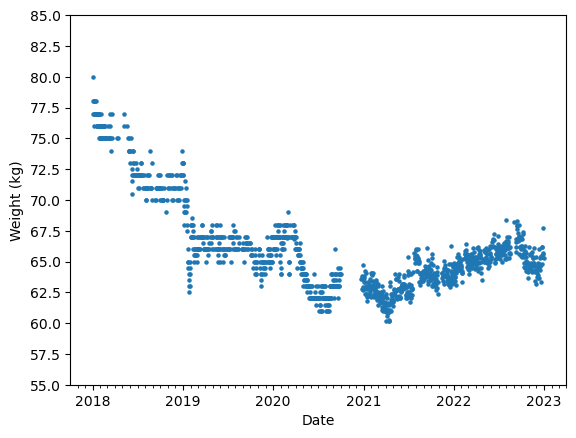

In [7]:

# plot the date as scatter plot
DataFrame.plot(kind="scatter", x = "Date", y = "Data", marker = ".")

# Add labels and title to the plot
plt.xlabel('Date')
plt.ylabel('Weight (kg)')

# edit y-axis range
plt.ylim(55,85)
plt.gca().yaxis.set_major_locator(plt.MultipleLocator(2.5))

# Make the x-axis label fancy
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().xaxis.set_minor_locator(mdates.MonthLocator())

plt.show()

In [127]:
CompiledAnnualData= None
CompiledAnnualData = pd.DataFrame(CompiledAnnualData, columns=["Date"])
# print(CompiledAnnualData)
years = data.columns[2:]
AnnualDate = data.columns[2] + "-" + data["Month"]  + "-" + data["Day"].astype(str)
x=[]


for i in range(len(years)):
    AnnualDate = data.columns[2+i] + "-" + data["Month"]  + "-" + data["Day"].astype(str)
    # print(AnnualDate)
    # q = data[years[i]]
    # print(type(q))
    x.append(AnnualDate.to_list())
    #AnnualData = pd.concat([AnnualDate, data[years[i]]],axis=1,ignore_index=False)
    #print(AnnualData.head())
    #test = pd.DataFrame(np.ravel([test, AnnualData], order = "F"))
    #CompiledAnnualData = pd.concat([CompiledAnnualData[["Date"]],AnnualDate],axis=1, ignore_index=False)
    #CompiledAnnualData["Date"] = CompiledAnnualData["Date"].append(AnnualDate)
    #CompiledAnnualData["Date"] = pd.concat(AnnualDate, ignore_index=True)
    #CompiledAnnualData = pd.concat([CompiledAnnualData, AnnualData],axis=1,ignore_index=False)
# print(CompiledAnnualData.head())
x = pd.DataFrame(x)
print(x.T)


                    0                 1                 2                 3  \
0      2018-January-1    2019-January-1    2020-January-1    2021-January-1   
1      2018-January-2    2019-January-2    2020-January-2    2021-January-2   
2      2018-January-3    2019-January-3    2020-January-3    2021-January-3   
3      2018-January-4    2019-January-4    2020-January-4    2021-January-4   
4      2018-January-5    2019-January-5    2020-January-5    2021-January-5   
..                ...               ...               ...               ...   
360  2018-December-27  2019-December-27  2020-December-27  2021-December-27   
361  2018-December-28  2019-December-28  2020-December-28  2021-December-28   
362  2018-December-29  2019-December-29  2020-December-29  2021-December-29   
363  2018-December-30  2019-December-30  2020-December-30  2021-December-30   
364  2018-December-31  2019-December-31  2020-December-31  2021-December-31   

                    4  
0      2022-January-1  
1  

In [38]:
aa = [['a','b','c'],[1,2,3],[4,5,6]]
print(aa)
pd.DataFrame(aa,columns=aa[0])

[['a', 'b', 'c'], [1, 2, 3], [4, 5, 6]]


,a,b,c
0,a,b,c
1,1,2,3
2,4,5,6


In [98]:
a = [1,2,3,4,5]
a.append(5)
print(a)

b= [1] *5
print(b)

[1, 2, 3, 4, 5, 5]
[1, 1, 1, 1, 1]


                0  2018               0  2019               0  2020  \
0  2018-January-1  78.0  2019-January-1  73.0  2020-January-1   NaN   
1  2018-January-2  80.0  2019-January-2  72.0  2020-January-2  67.0   
2  2018-January-3  77.0  2019-January-3  72.0  2020-January-3  67.0   
3  2018-January-4  77.0  2019-January-4  70.0  2020-January-4  66.0   
4  2018-January-5  76.0  2019-January-5  69.5  2020-January-5  66.0   

                0   2021               0   2022  
0  2021-January-1  63.35  2022-January-1  64.85  
1  2021-January-2  62.85  2022-January-2  64.70  
2  2021-January-3  63.80  2022-January-3  64.25  
3  2021-January-4  63.70  2022-January-4  64.45  
4  2021-January-5  63.30  2022-January-5  63.75  


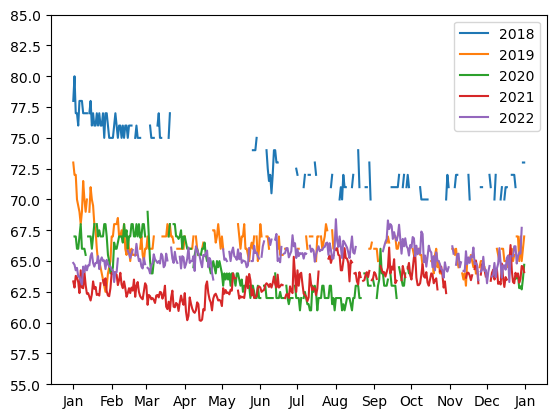

In [9]:
# Second attempt
# I will make a date dependent data annually instead of just a whole list.
CompiledAnnualData= None
years = data.columns[2:]
AnnualDate = data.columns[2] + "-" + data["Month"]  + "-" + data["Day"].astype(str)

for i in range(len(years)):
    AnnualDate = data.columns[2+i] + "-" + data["Month"]  + "-" + data["Day"].astype(str)
    AnnualData = pd.concat([AnnualDate, data[years[i]]],axis=1,ignore_index=False)
    #print(AnnualData.head())
    #test = pd.DataFrame(np.ravel([test, AnnualData], order = "F"))
    CompiledAnnualData = pd.concat([CompiledAnnualData, AnnualData],axis=1,ignore_index=False)
print(CompiledAnnualData.head())

#CompiledAnnualData.plot(kind = "scatter", x = 0, y = '2018')
CompiledAnnualData.plot()

# edit y-axis range
plt.ylim(55,85)
plt.gca().yaxis.set_major_locator(plt.MultipleLocator(2.5))

# Make the x-axis label fancy
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))
#plt.gca().xaxis.set_minor_locator(mdates.MonthLocator())


In [10]:
DataFrame.head()

,Date,Data
0,2018-01-01,78.0
1,2018-01-02,80.0
2,2018-01-03,77.0
3,2018-01-04,77.0
4,2018-01-05,76.0


In [11]:
x = (data['Month']) + " "+ data['Day'].astype(str)
print(x)

0        January 1
1        January 2
2        January 3
3        January 4
4        January 5
          ...     
360    December 27
361    December 28
362    December 29
363    December 30
364    December 31
Length: 365, dtype: object


In [12]:
y = data['2018']
print(y)

0      78.0
1      80.0
2      77.0
3      77.0
4      76.0
       ... 
360     NaN
361    73.0
362     NaN
363    73.0
364    73.0
Name: 2018, Length: 365, dtype: float64


ValueError: x and y must be the same size

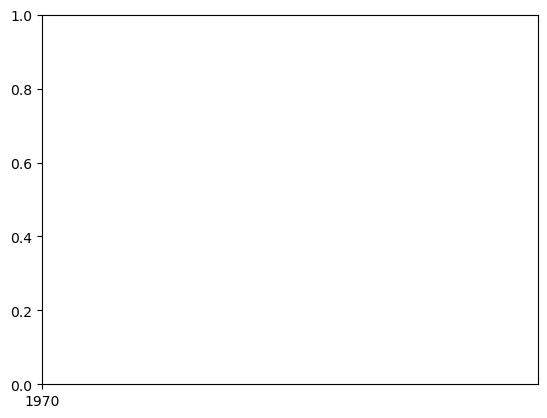

In [13]:
x = date
# Set the x-axis tick intervals
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().xaxis.set_minor_locator(mdates.MonthLocator())

plt.scatter(x,y)